# <center>**projet Analyse et Fouille de Données**
#  <center>Med Safwen Ben Amara 2BD2

Le dataset analysé contient des informations démographiques et socio-économiques pour les 50 États des États-Unis. Les variables incluses sont :

    -State : Nom de l'État (variable qualitative)
    -Population : Estimation de la population en milliers (variable quantitative)
    -Income : Revenu par habitant en dollars (variable quantitative)
    -Illiteracy : Taux d'analphabétisme (%) (variable quantitative)
    -Life Exp : Espérance de vie en années (variable quantitative)
    -Murder : Taux d'homicides pour 100 000 habitants (variable quantitative)
    -HS Grad : Pourcentage de diplômés du secondaire (variable quantitative)
    -Frost : Nombre moyen de jours de gel par an (variable quantitative)
    -Area : Superficie en miles carrés (variable quantitative)

In [5]:
# Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [2]:
# Importation du jeu de données 'usa'

df = pd.read_csv('statistical.csv')

df.head()

,State,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361


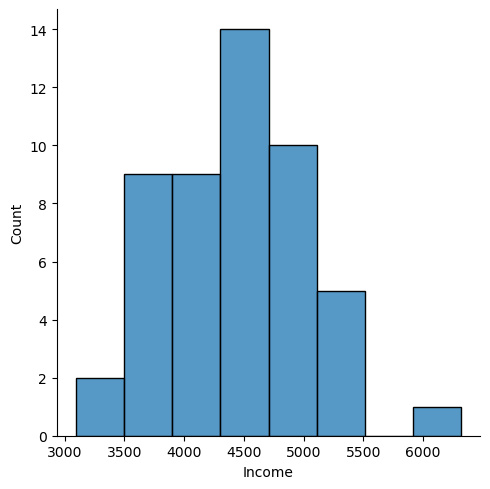

In [30]:
sns.displot(
    df["Income"], 
    kde = False)

Ce graphique affiche la distribution des revenus moyens (Income) dans les différents États. L'axe des abscisses représente les valeurs de revenu et l'axe des ordonnées montre la fréquence d’apparition. Cela permet de repérer la tendance centrale et la dispersion des revenus

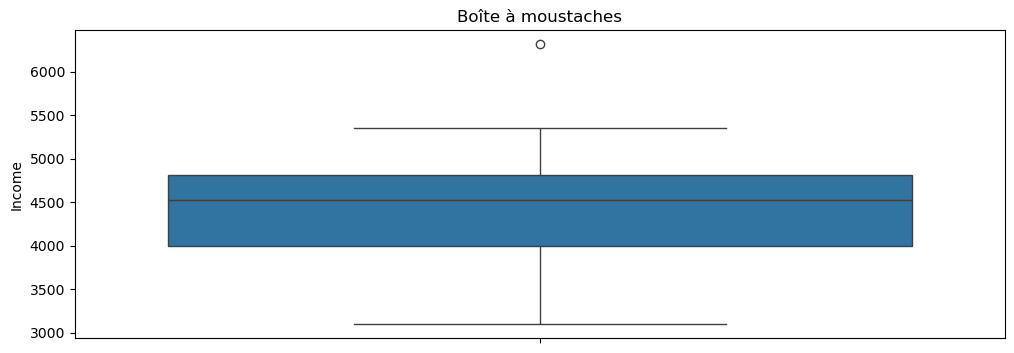

In [25]:


plt.figure(figsize=(12, 4))

sns.boxplot(y = 'Income', data = df).set_title('Boîte à moustaches');

Cette boîte à moustaches (boxplot) permet de visualiser la distribution des revenus de manière plus précise : médiane, quartiles, valeurs extrêmes (outliers). Elle met en évidence les éventuelles valeurs aberrantes et la répartition des données autour de la médiane

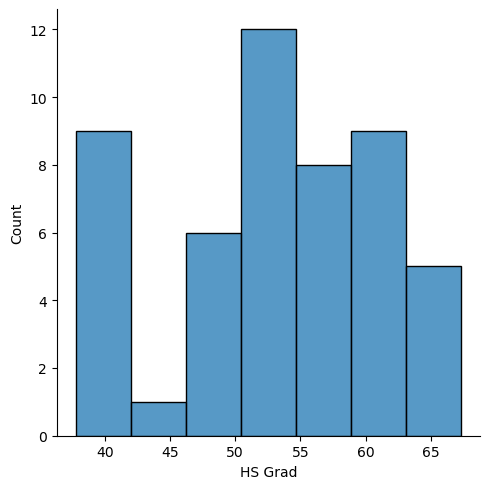

In [32]:
sns.displot(
    df["HS Grad"], 
    kde = False)

Ce graphique montre la distribution du pourcentage de diplômés de l’enseignement secondaire dans les différents États.Cela permet de repérer si la majorité des États ont un taux élevé ou faible de diplômés

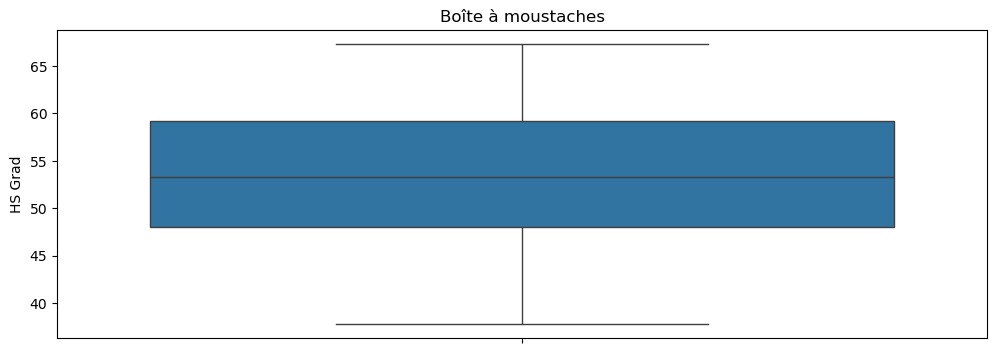

In [36]:
plt.figure(figsize=(12, 4))

sns.boxplot(y = 'HS Grad', data = df).set_title('Boîte à moustaches');

Cette boîte à moustaches (boxplot) permet de visualiser la distribution du pourcentage de diplômés de l’enseignement secondaire de manière plus précise : médiane, quartiles, valeurs extrêmes (outliers). Elle met en évidence les éventuelles valeurs aberrantes et la répartition des données autour de la médiane

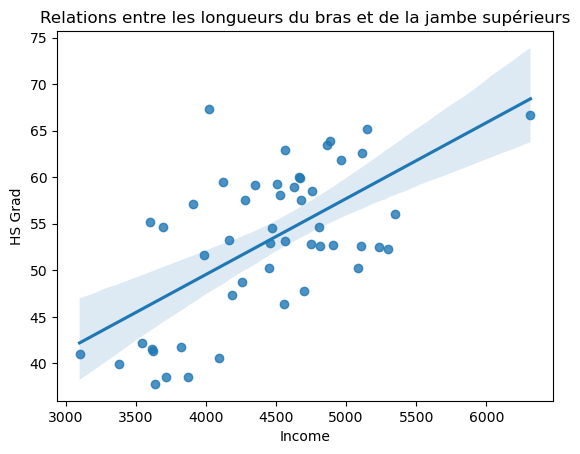

In [19]:
sns.regplot(
    x="Income", 
    y="HS Grad", 
    fit_reg=True,
    data=df).set_title('Relations entre les longueurs du bras et de la jambe supérieurs');

Ce graphique illustre la relation linéaire entre les revenus moyens (Income) et le taux de diplômés du secondaire (HS Grad).
La ligne de régression permet de visualiser la tendance générale : on observe ici une relation positive, indiquant que les États avec un taux plus élevé de diplômés ont tendance à avoir des revenus moyens plus élevés.

In [12]:
# Coefficient de Pearson entre les variables 'Income' 'Hs Grad'

stats.pearsonr(df['Income'], df['HS Grad'])

PearsonRResult(statistic=0.6199323231340026, pvalue=1.5787733474831544e-06)

Le coefficient de corrélation de Pearson entre la moyenne des salaires et celle du nombre des diplômé du lycée est égal à 0.62 pour une p-valeur égale à 1.5e-06. Donc il existe une corrélation positive modérément forte et statistiquement significative (p-valeur < 0.05) entre la moyenne des salaires et le nombre des diplômé du lycée.

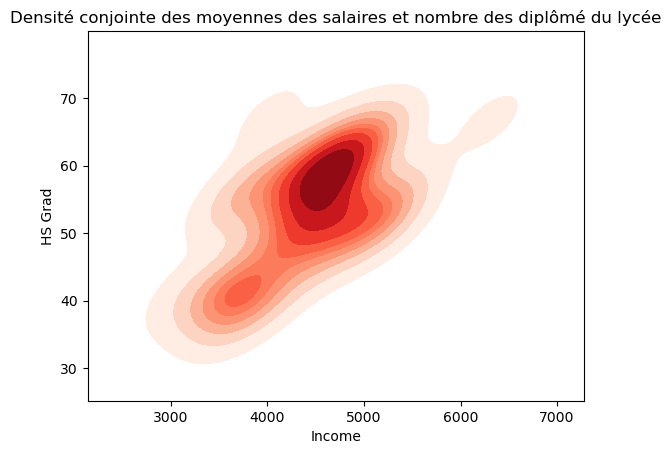

In [16]:
sns.kdeplot(
    x="Income", 
    y="HS Grad", 
    cmap="Reds", 
    fill=True, 
    data=df).set_title('Densité conjointe des moyennes des salaires et nombre des diplômé du lycée');

Ce graphique de densité (KDE) montre les zones où les combinaisons de Income et HS Grad sont les plus fréquentes dans les données. Les zones plus foncées indiquent une plus forte concentration d’observations. Cela confirme visuellement la relation positive entre les deux variables.

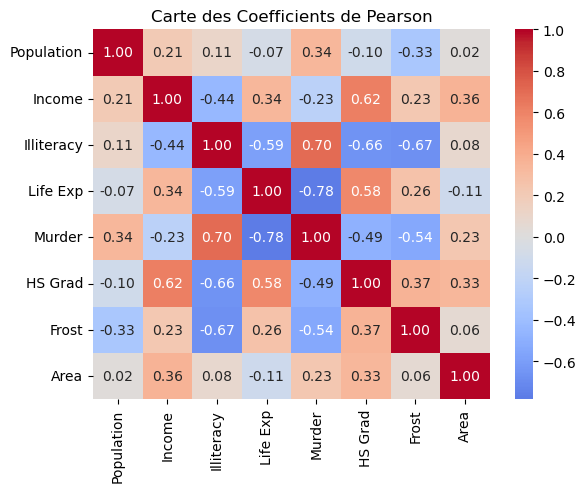

In [14]:
corr = df.drop(columns='State').corr()

sns.heatmap(corr,
    cmap='coolwarm',   
    center=0,          
    annot=True,        
    fmt=".2f",
           
           
           ).set_title('Carte des Coefficients de Pearson');

Cette carte de chaleur affiche la matrice des corrélations de Pearson entre toutes les variables numériques du dataset (sauf le nom de l'État). Elle permet de repérer rapidement quelles variables sont fortement corrélées positivement ou négativement entre elles.

C:\Users\SKYMIL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SKYMIL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


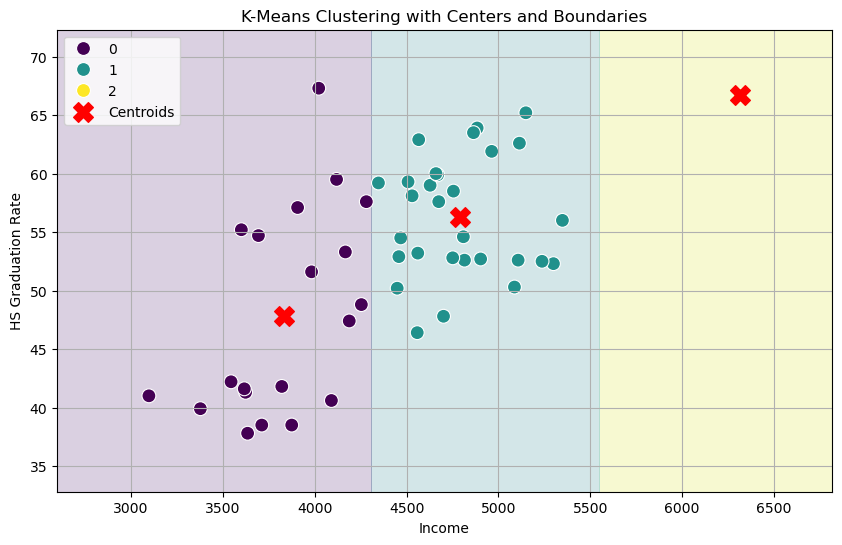

In [20]:
#KMeans

# Select features
X = df[['Income', 'HS Grad']]

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Plotting
plt.figure(figsize=(10, 6))

# Create meshgrid for background decision boundary
x_min, x_max = X['Income'].min() - 500, X['Income'].max() + 500
y_min, y_max = X['HS Grad'].min() - 5, X['HS Grad'].max() + 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, cmap='viridis')

# Scatter plot of data points
sns.scatterplot(data=df, x='Income', y='HS Grad', hue='Cluster', palette='viridis', s=100)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Titles and labels
plt.title("K-Means Clustering with Centers and Boundaries")
plt.xlabel("Income")
plt.ylabel("HS Graduation Rate")
plt.legend()
plt.grid(True)
plt.show()

Cette partie applique l’algorithme de clustering K-Means pour regrouper les États en 3 clusters basés sur deux variables : le revenu moyen (Income) et le taux de diplômés du secondaire (HS Grad).

   . Chaque point est un État.

   . Les couleurs représentent les clusters.

   . Les croix rouges indiquent les centroïdes de chaque groupe.

   . Les zones colorées en fond indiquent les frontières de décision du modèle.

Cela permet de segmenter les États selon des caractéristiques socio-économiques similaires

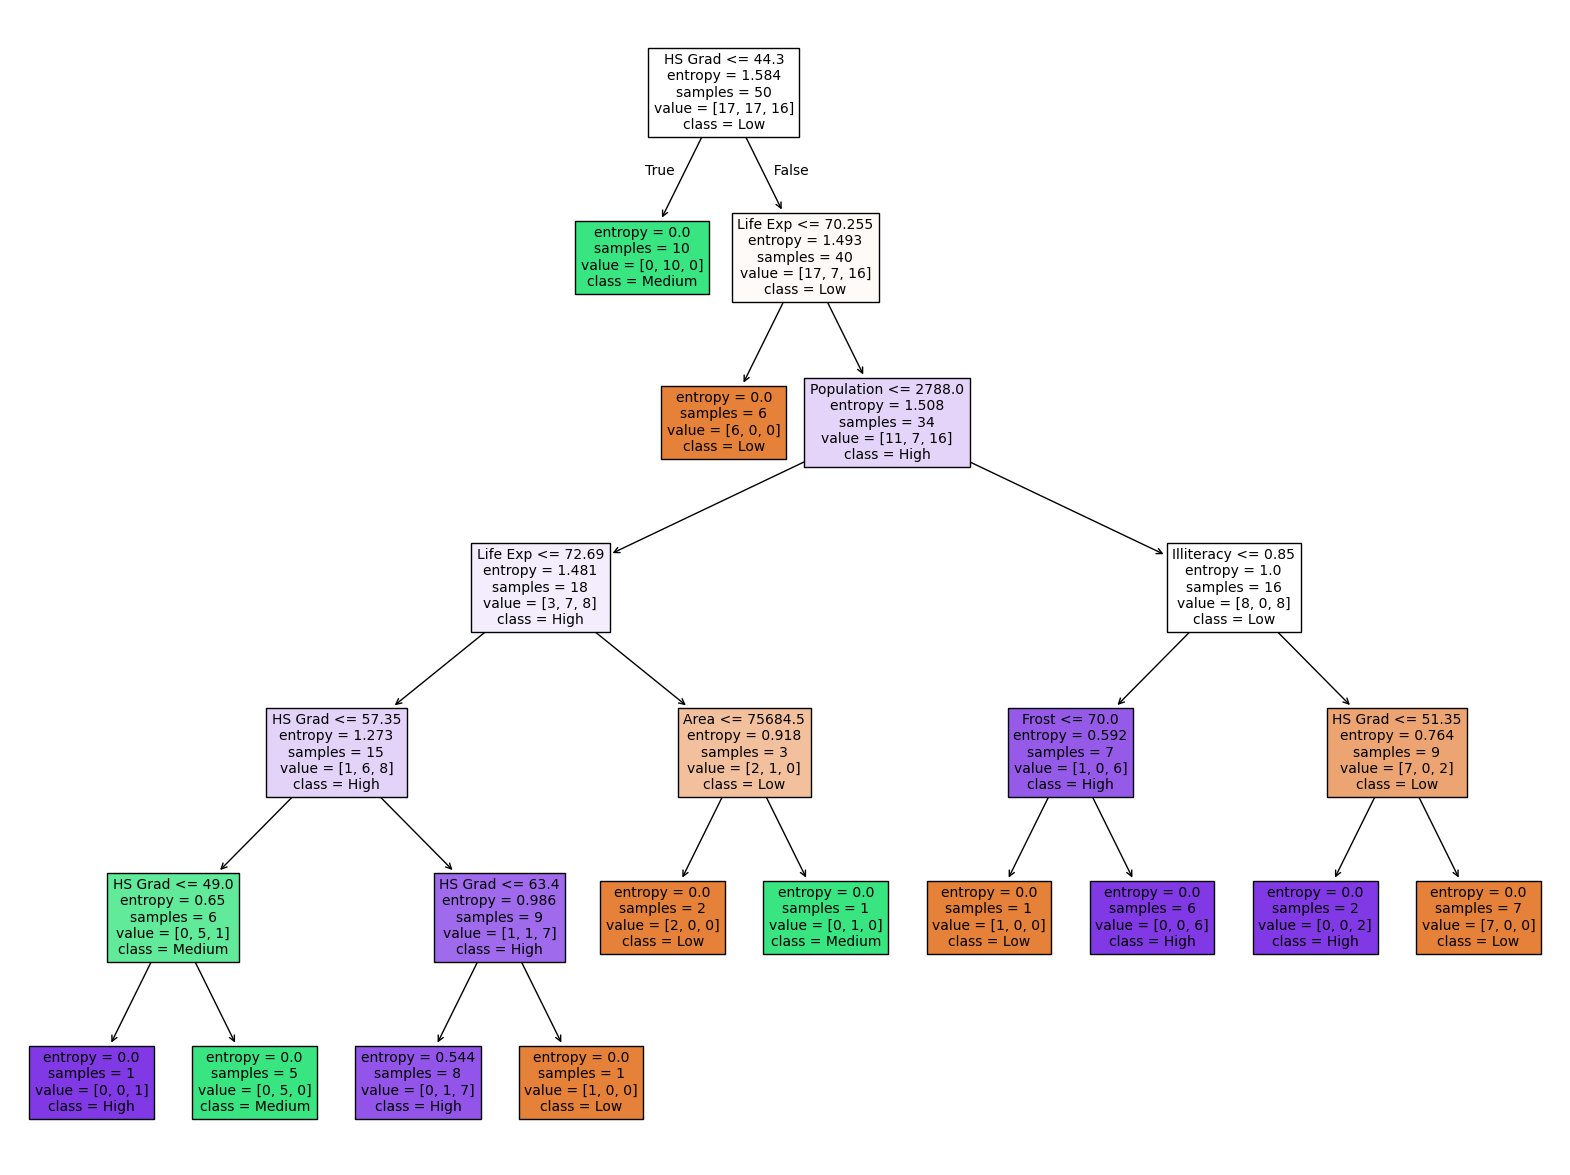

In [15]:
df['Income_Class'] = pd.qcut(df['Income'], q=3, labels=['Low', 'Medium', 'High'])

X = df.drop(columns=['State', 'Income', 'Income_Class'])
y = df['Income_Class']


clf = DecisionTreeClassifier(criterion='entropy',max_depth=6, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(20, 15))
plot_tree(clf, feature_names=X.columns, class_names=['Low', 'Medium', 'High'], filled=True,fontsize=10)
plt.show()

On divise les revenus (Income) en trois classes : bas, moyen, élevé. Puis, on entraîne un arbre de décision pour prédire à quelle classe de revenu un État appartient en se basant sur les autres caractéristiques (comme Murder, HS Grad, Life Exp, etc.).

L’arbre permet d’identifier les critères les plus discriminants pour expliquer la classe de revenu. Les feuilles terminales montrent les décisions finales, et les couleurs représentent les classes prédites.

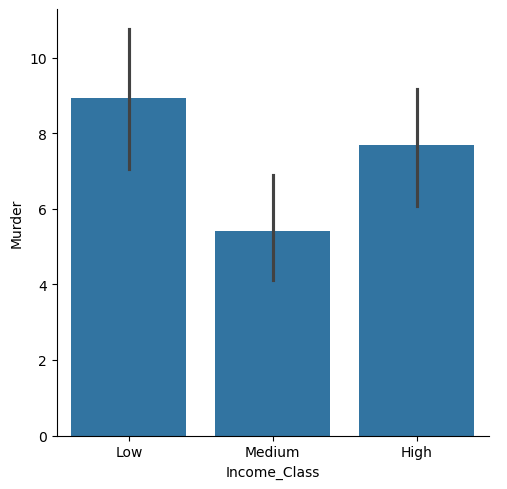

In [23]:
sns.catplot(x = "Income_Class", y = "Murder", kind = "bar", data = df);

Ce graphique en barres montre la relation entre le revenu moyen des États et leur taux d’homicide (Murder). On peut ainsi voir si les États avec un revenu faible ont tendance à avoir un taux de criminalité plus élevé, ou inversement. C’est une analyse utile pour explorer des corrélations socio-économiques.